In [58]:
# Import required libraries and dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [9]:
# Generate summary statistics

df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [10]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=900,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [11]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [16]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# fit the model
scaler.fit(df_market_data)

# predict/transform
scaled_data = scaler.transform(df_market_data)

In [17]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Reset coin_id as index
df_scaled.index = df_market_data.index

# Reset index to make coin_id a column
df_scaled_index = df_scaled.index.copy()

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [ ]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11)) # Adjusted range from 1 - 11 vs 2 - 11 per grading feedfback

In [19]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
    # Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # Fit the model to the data
    k_model.fit(df_scaled)
    
    # predict the model
    preds = k_model.predict(df_scaled)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

    
    print(f"Finished {i} out of {max(k)}")


Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [20]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_scaled = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_scaled = pd.DataFrame(elbow_data_scaled)
df_elbow_scaled.head()

,k,inertia
0,2,212.123342
1,3,165.136752
2,4,79.022435
3,5,66.413051
4,6,61.634088


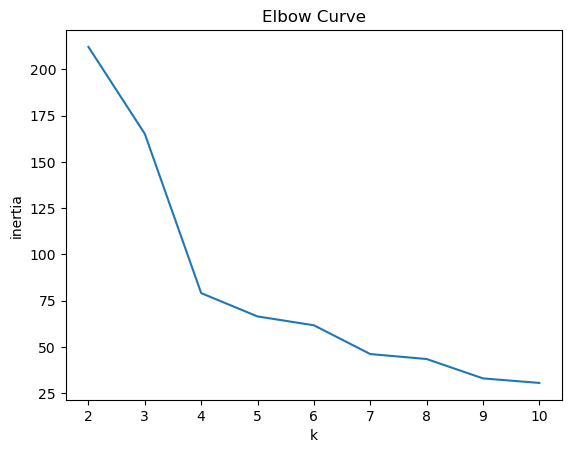

In [22]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow_scaled["k"], df_elbow_scaled["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow_scaled["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

In [50]:
# Scaled elbow plot data for use in composite plot
elbow_plot_scaled = df_elbow_scaled.hvplot.line(x="k", y="inertia", title="Elbow Curve Using Scaled Data", xticks=k,
    width=500, height=300)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [27]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

KMeans(n_clusters=4, random_state=1)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(df_scaled)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [29]:
# Create a copy of the DataFrame
df_scaled2 = df_scaled.copy()

In [30]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled2["clusters"] = preds

# Display sample data
df_scaled2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [56]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scaled_scatter_plot = df_scaled2.reset_index().hvplot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", by="clusters",
                        height=300, width = 500,
                         hover_cols="coin_id")

scaled_scatter_plot

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [32]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3
pca = PCA(n_components = n_components)

In [33]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
df_pca = pd.DataFrame(pca_data, columns = ["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index  = df_scaled.index

df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [34]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)
print(sum(explained_variance_ratio))

[0.3719856  0.34700813 0.17603793]
0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 0.895031657030984

3 components explains ~90% of the variance

In [35]:
# Create a new DataFrame with the PCA data.
# ******* Already created above *********

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [36]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [37]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
    # Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # Fit the model to the data
    k_model.fit(df_pca)
    
    # predict the model
    preds = k_model.predict(df_pca)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

    
    print(f"Finished {i} out of {max(k)}")


Finished 1 out of 10
Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [38]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca.head()

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582


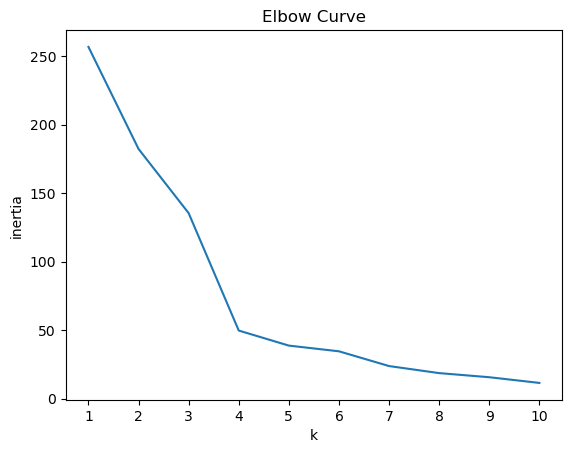

In [39]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow_pca["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

In [51]:
# PCA elbow plot data for use in composite plot
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k,
    width=500, height=300)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [41]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [42]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)

KMeans(n_clusters=4, random_state=1)

In [43]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = model.predict(df_pca)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [44]:
# Create a copy of the DataFrame with the PCA data
df_pca2 = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca2["clusters"] = preds

# Display sample data
df_pca2.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [55]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

pca_scatter_plot = df_pca2.reset_index().hvplot.scatter(x="PCA_1", y="PCA_2", by="clusters",
                        height=300, width = 500,
                         hover_cols="coin_id")

pca_scatter_plot

:NdOverlay   [clusters]
   :Scatter   [PCA_1]   (PCA_2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [52]:
# Composite plot to contrast the Elbow curves
elbow_plot_scaled + elbow_plot_pca

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [57]:
# Composite plot to contrast the clusters
scaled_scatter_plot + pca_scatter_plot

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PCA_1]   (PCA_2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer: Using Principle Component Analysis reduced the noise and produced better initeria values, a slightly better elblow plot and tighter clusters on the scatter plots. 